In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (42000, 785)
Test shape: (28000, 784)


In [3]:
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

X_test = test_df

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)

X_train: (42000, 784)
y_train: (42000,)
X_test: (28000, 784)


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42
)

print("Training:", X_train.shape)
print("Validation:", X_val.shape)

Training: (37800, 784)
Validation: (4200, 784)


In [8]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8177 - loss: 0.5944 - val_accuracy: 0.9524 - val_loss: 0.1660
Epoch 2/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9524 - loss: 0.1527 - val_accuracy: 0.9643 - val_loss: 0.1147
Epoch 3/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9654 - loss: 0.1103 - val_accuracy: 0.9683 - val_loss: 0.0983
Epoch 4/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9723 - loss: 0.0854 - val_accuracy: 0.9740 - val_loss: 0.0885
Epoch 5/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9755 - loss: 0.0765 - val_accuracy: 0.9721 - val_loss: 0.0928
Epoch 6/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9796 - loss: 0.0593 - val_accuracy: 0.9740 - val_loss: 0.0868
Epoch 7/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9822 - loss: 0.0544 - val_accuracy: 0.9717 - val_loss: 0.0955
Epoch 8/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9828 - loss: 0.0496 - val_accuracy: 0.

In [9]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9782 - loss: 0.1064
Validation Accuracy: 0.9780952334403992


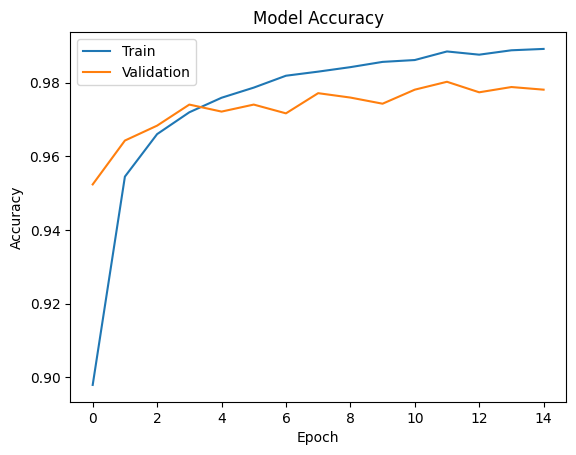

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

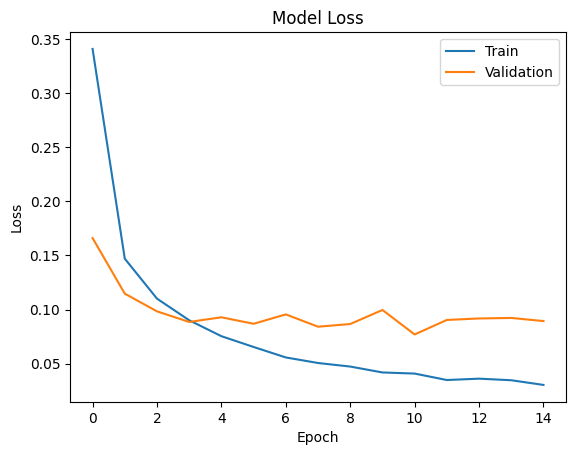

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [12]:
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [14]:
submission = pd.DataFrame({
    "ImageId": range(1, len(predicted_labels) + 1),
    "Label": predicted_labels
})

submission.to_csv("submission.csv", index=False)